# Importing necessary packages

In [1]:
import os,glob
from keras.models import load_model
from keras.models import Model
from keras.layers import Input
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import skimage
from skimage.transform import resize
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

Using TensorFlow backend.


## Loading the inception model

In [2]:
model = load_model("inception_model.h5")

In [3]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 16, 16, 256)  0           activation_100[0][0]             
                                                                 activation_102[0][0]             
                                                                 activation_105[0][0]             
                                                                 activation_106[0][0]             
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 16, 16, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_110 (BatchN (None, 16, 16, 64)   192         conv2d_113[0][0]                 
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_114 (BatchN (None, 16, 16, 64)   192         conv2d_117[0][0]                 
__________________________________________________________________________________________________
batch_normalization_116 (BatchN (None, 16, 16, 64)   192         conv2d_119[0][0]                 
__________________________________________________________________________________________________
batch_normalization_119 (BatchN (None, 16, 16, 96)   288         conv2d_122[0][0]                 
__________________________________________________________________________________________________
batch_normalization_120 (BatchN (None, 16, 16, 64)   192         conv2d_123[0][0]                 
__________________________________________________________________________________________________
activation_114 (Activation)     (None, 16, 16, 64)   0           batch_normalization_114[0][0]    
__________

batch_normalization_132 (BatchN (None, 7, 7, 128)    384         conv2d_135[0][0]                 
__________________________________________________________________________________________________
activation_127 (Activation)     (None, 7, 7, 128)    0           batch_normalization_127[0][0]    
__________________________________________________________________________________________________
activation_132 (Activation)     (None, 7, 7, 128)    0           batch_normalization_132[0][0]    
__________________________________________________________________________________________________
average_pooling2d_13 (AveragePo (None, 7, 7, 768)    0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_128 (Conv2D)             (None, 7, 7, 192)    147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_131

__________________________________________________________________________________________________
batch_normalization_135 (BatchN (None, 7, 7, 192)    576         conv2d_138[0][0]                 
__________________________________________________________________________________________________
batch_normalization_138 (BatchN (None, 7, 7, 192)    576         conv2d_141[0][0]                 
__________________________________________________________________________________________________
batch_normalization_143 (BatchN (None, 7, 7, 192)    576         conv2d_146[0][0]                 
__________________________________________________________________________________________________
batch_normalization_144 (BatchN (None, 7, 7, 192)    576         conv2d_147[0][0]                 
__________________________________________________________________________________________________
activation_135 (Activation)     (None, 7, 7, 192)    0           batch_normalization_135[0][0]    
__________

activation_154 (Activation)     (None, 7, 7, 192)    0           batch_normalization_154[0][0]    
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 7, 7, 768)    0           activation_145[0][0]             
                                                                 activation_148[0][0]             
                                                                 activation_153[0][0]             
                                                                 activation_154[0][0]             
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 7, 7, 192)    147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_159 (BatchN (None, 7, 7, 192)    576         conv2d_162[0][0]                 
__________

batch_normalization_168 (BatchN (None, 7, 7, 192)    576         conv2d_171[0][0]                 
__________________________________________________________________________________________________
activation_168 (Activation)     (None, 7, 7, 192)    0           batch_normalization_168[0][0]    
__________________________________________________________________________________________________
conv2d_168 (Conv2D)             (None, 7, 7, 192)    147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_172 (Conv2D)             (None, 7, 7, 192)    258048      activation_168[0][0]             
__________________________________________________________________________________________________
batch_normalization_165 (BatchN (None, 7, 7, 192)    576         conv2d_168[0][0]                 
__________________________________________________________________________________________________
batch_norm

activation_178 (Activation)     (None, 3, 3, 384)    0           batch_normalization_178[0][0]    
__________________________________________________________________________________________________
batch_normalization_179 (BatchN (None, 3, 3, 192)    576         conv2d_182[0][0]                 
__________________________________________________________________________________________________
activation_171 (Activation)     (None, 3, 3, 320)    0           batch_normalization_171[0][0]    
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 3, 3, 768)    0           activation_173[0][0]             
                                                                 activation_174[0][0]             
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 3, 3, 768)    0           activation_177[0][0]             
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_4[0][0]              
                                                                 activation_188[0][0]             
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 3, 3, 2048)   0           mixed10[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 2048)         0           dropout_1[0][0]                  
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          262272      global_average_pooling2d_1[0][0] 
__________________________________________________________________________________________________
batch_norm

Filtering the last classifier layers

In [4]:
new_model = Model(model.inputs, model.layers[-5].output) 

In [5]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 16, 16, 256)  0           activation_100[0][0]             
                                                                 activation_102[0][0]             
                                                                 activation_105[0][0]             
                                                                 activation_106[0][0]             
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 16, 16, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_110 (BatchN (None, 16, 16, 64)   192         conv2d_113[0][0]                 
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_114 (BatchN (None, 16, 16, 64)   192         conv2d_117[0][0]                 
__________________________________________________________________________________________________
batch_normalization_116 (BatchN (None, 16, 16, 64)   192         conv2d_119[0][0]                 
__________________________________________________________________________________________________
batch_normalization_119 (BatchN (None, 16, 16, 96)   288         conv2d_122[0][0]                 
__________________________________________________________________________________________________
batch_normalization_120 (BatchN (None, 16, 16, 64)   192         conv2d_123[0][0]                 
__________________________________________________________________________________________________
activation_114 (Activation)     (None, 16, 16, 64)   0           batch_normalization_114[0][0]    
__________

batch_normalization_132 (BatchN (None, 7, 7, 128)    384         conv2d_135[0][0]                 
__________________________________________________________________________________________________
activation_127 (Activation)     (None, 7, 7, 128)    0           batch_normalization_127[0][0]    
__________________________________________________________________________________________________
activation_132 (Activation)     (None, 7, 7, 128)    0           batch_normalization_132[0][0]    
__________________________________________________________________________________________________
average_pooling2d_13 (AveragePo (None, 7, 7, 768)    0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_128 (Conv2D)             (None, 7, 7, 192)    147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_131

__________________________________________________________________________________________________
batch_normalization_135 (BatchN (None, 7, 7, 192)    576         conv2d_138[0][0]                 
__________________________________________________________________________________________________
batch_normalization_138 (BatchN (None, 7, 7, 192)    576         conv2d_141[0][0]                 
__________________________________________________________________________________________________
batch_normalization_143 (BatchN (None, 7, 7, 192)    576         conv2d_146[0][0]                 
__________________________________________________________________________________________________
batch_normalization_144 (BatchN (None, 7, 7, 192)    576         conv2d_147[0][0]                 
__________________________________________________________________________________________________
activation_135 (Activation)     (None, 7, 7, 192)    0           batch_normalization_135[0][0]    
__________

activation_154 (Activation)     (None, 7, 7, 192)    0           batch_normalization_154[0][0]    
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 7, 7, 768)    0           activation_145[0][0]             
                                                                 activation_148[0][0]             
                                                                 activation_153[0][0]             
                                                                 activation_154[0][0]             
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 7, 7, 192)    147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_159 (BatchN (None, 7, 7, 192)    576         conv2d_162[0][0]                 
__________

batch_normalization_168 (BatchN (None, 7, 7, 192)    576         conv2d_171[0][0]                 
__________________________________________________________________________________________________
activation_168 (Activation)     (None, 7, 7, 192)    0           batch_normalization_168[0][0]    
__________________________________________________________________________________________________
conv2d_168 (Conv2D)             (None, 7, 7, 192)    147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_172 (Conv2D)             (None, 7, 7, 192)    258048      activation_168[0][0]             
__________________________________________________________________________________________________
batch_normalization_165 (BatchN (None, 7, 7, 192)    576         conv2d_168[0][0]                 
__________________________________________________________________________________________________
batch_norm

activation_178 (Activation)     (None, 3, 3, 384)    0           batch_normalization_178[0][0]    
__________________________________________________________________________________________________
batch_normalization_179 (BatchN (None, 3, 3, 192)    576         conv2d_182[0][0]                 
__________________________________________________________________________________________________
activation_171 (Activation)     (None, 3, 3, 320)    0           batch_normalization_171[0][0]    
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 3, 3, 768)    0           activation_173[0][0]             
                                                                 activation_174[0][0]             
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 3, 3, 768)    0           activation_177[0][0]             
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_4[0][0]              
                                                                 activation_188[0][0]             
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 3, 3, 2048)   0           mixed10[0][0]                    
Total params: 21,802,784
Trainable params: 21,768,352
Non-trainable params: 34,432
__________________________________________________________________________________________________


Fetching the image files

In [6]:
COVIDImages = "COVIDImages"
OtherImages = "OtherImages"
filelists = []

In [7]:
imdir1 = COVIDImages
filelist1 = glob.glob(os.path.join(imdir1, '*'))
filelist1.sort()
filelists.append(filelist1)
imdir2 = OtherImages
filelist2 = glob.glob(os.path.join(imdir2, '*'))
filelist2.sort()
filelists.append(filelist2)

In [8]:
len(filelists)

2

In [9]:
def get_data(filelist):
    X = []
    y = []
    WIDTH = 150
    HEIGHT = 150
    for filelist in filelists:
        for image in tqdm(filelist):
            base = os.path.basename(image)
            label = 0 if any("COVID" in s for s in filelist) else 1
            img = cv2.imread(image)
            img = skimage.transform.resize(img, (WIDTH, HEIGHT, 3))
            img = np.asarray(img)
            X.append(img)
            y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [10]:
X_train,y_train = get_data(filelists)

100%|██████████| 209/209 [01:12<00:00,  2.89it/s]


In [11]:
X_train.shape

(418, 150, 150, 3)

In [12]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
batch_holder = np.zeros(X_train.shape)
for i,img in enumerate(X_train):
    batch_holder[i, :] = img

In [14]:
result=new_model.predict(batch_holder)

In [15]:
result.shape

(418, 3, 3, 2048)

In [16]:
nsamples, nx, ny, nz = result.shape

In [17]:
d2_train_dataset = result.reshape((nsamples,nx*ny*nz))

## PCA for the train data 

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2_train_dataset)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
principalDf #Principal Components

,principal component 1,principal component 2
0,-100.704773,6.714652
1,-100.767120,6.790287
2,-100.972023,8.408571
3,-100.889999,7.752181
4,-100.939255,8.130751
...,...,...
413,-25.922192,-24.854021
414,148.885178,4.853137
415,174.689423,9.623315
416,132.215210,2.571312


In [20]:
pca.explained_variance_ratio_

array([0.9841529 , 0.00911196], dtype=float32)

## K-means 

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(d2_train_dataset)

In [23]:
clusters_kmeans = kmeans.labels_

In [24]:
clusters_kmeans 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [25]:
pred_kmeans = clusters_kmeans
score = round(accuracy_score(pred_kmeans, y_train), 4)
print('Accuracy scored using k-means clustering: ', score)

Accuracy scored using k-means clustering:  0.9474


## K-means with PCA 

In [26]:
kmeans_pca = KMeans(n_clusters=2, random_state=0).fit(principalDf)

In [27]:
clusters_kmeans_pca = kmeans_pca.labels_

In [28]:
clusters_kmeans_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [29]:
kMeansDf = pd.concat([principalDf, pd.DataFrame({"cluster_kmeans_pca": clusters_kmeans_pca})], axis = 1)

In [30]:
kMeansDf['cluster_kmeans_pca'] = kMeansDf['cluster_kmeans_pca'].map({0: "COVID", 1: "NORMAL"})

In [31]:
kMeansDf

,principal component 1,principal component 2,cluster_kmeans_pca
0,-100.704773,6.714652,COVID
1,-100.767120,6.790287,COVID
2,-100.972023,8.408571,COVID
3,-100.889999,7.752181,COVID
4,-100.939255,8.130751,COVID
...,...,...,...
413,-25.922192,-24.854021,COVID
414,148.885178,4.853137,NORMAL
415,174.689423,9.623315,NORMAL
416,132.215210,2.571312,NORMAL


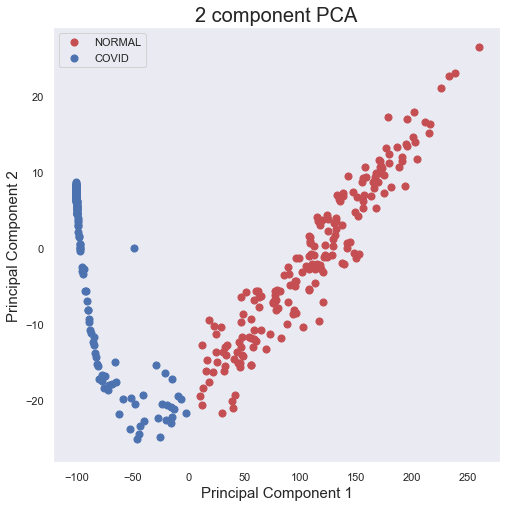

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["NORMAL","COVID"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = kMeansDf['cluster_kmeans_pca'] == target
    ax.scatter(kMeansDf.loc[indicesToKeep, 'principal component 1']
               , kMeansDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [33]:
def conf_mat(cm):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Normal', 'Covid']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);

In [34]:
sse = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
print(f'SSE: {sse}')
conf_mat_kmeans = confusion_matrix(y_train, pred_kmeans)
print("Confusion Matrix")
print(conf_mat_kmeans)
cr_kmeans=classification_report(y_train,pred_kmeans)
print(cr_kmeans)

SSE: 800030.6077188897
Confusion Matrix
[[208   1]
 [ 21 188]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       209
           1       0.99      0.90      0.94       209

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



## WARD 

In [35]:
model = AgglomerativeClustering(n_clusters=2,linkage="ward")
model.fit(d2_train_dataset)
model.labels_
x = model.labels_

In [36]:
x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [37]:
for i in range(len(x)):
    if(x[i]==0):
        x[i]=1
    else:
        x[i]=0

In [38]:
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [39]:
score = round(accuracy_score(x, y_train), 4)
print('Accuracy scored using Agglomerative clustering: ', score)

Accuracy scored using Agglomerative clustering:  0.9474


## WARD_PCA 

In [40]:
model_pca = AgglomerativeClustering(n_clusters=2,linkage="ward")
model.fit(principalDf)
clusters_ward_pca = model.labels_
clusters_ward_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
clusters_ward_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
wardDf = pd.concat([principalDf, pd.DataFrame({"clusters_ward_pca": clusters_ward_pca})], axis = 1)
wardDf['clusters_ward_pca'] = wardDf['clusters_ward_pca'].map({0: "COVID", 1: "NORMAL"})
wardDf

,principal component 1,principal component 2,clusters_ward_pca
0,-100.704773,6.714652,NORMAL
1,-100.767120,6.790287,NORMAL
2,-100.972023,8.408571,NORMAL
3,-100.889999,7.752181,NORMAL
4,-100.939255,8.130751,NORMAL
...,...,...,...
413,-25.922192,-24.854021,COVID
414,148.885178,4.853137,COVID
415,174.689423,9.623315,COVID
416,132.215210,2.571312,COVID


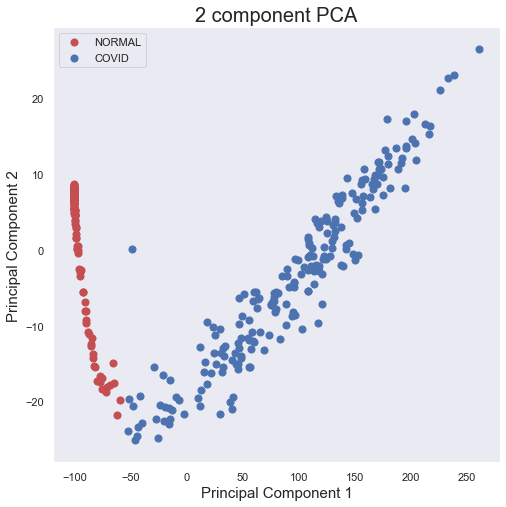

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["NORMAL","COVID"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = wardDf['clusters_ward_pca'] == target
    ax.scatter(wardDf.loc[indicesToKeep, 'principal component 1']
               , wardDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [44]:
conf_mat_ward = confusion_matrix(y_train, x)
print("Confusion matrix")
print(conf_mat_ward)
cr_ward=classification_report(y_train,x)
print(cr_ward)

Confusion matrix
[[208   1]
 [ 21 188]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       209
           1       0.99      0.90      0.94       209

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



# Complete Linkage 

In [45]:
model1 = AgglomerativeClustering(n_clusters=2, compute_full_tree=True,
    affinity='euclidean', linkage='complete')
model1.fit(d2_train_dataset)
model1.labels_
x1 = model1.labels_

In [46]:
x1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [47]:
for i in range(len(x1)):
    if(x1[i]==0):
        x1[i]=1
    else:
        x1[i]=0

In [48]:
score = round(accuracy_score(x1, y_train), 4)
print('Accuracy scored using complete linkage Agglomerative clustering: ', score)

Accuracy scored using complete linkage Agglomerative clustering:  0.9474


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       209
           1       0.99      0.90      0.94       209

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



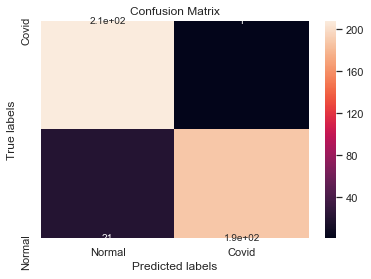

In [49]:
conf_mat_complete = confusion_matrix(y_train, x1)
conf_mat(conf_mat_complete)
cr_complete=classification_report(y_train,x1)
print(cr_complete)

##  Complete Linkage_PCA

In [50]:
model1_pca = AgglomerativeClustering(n_clusters=2, compute_full_tree=True,
    affinity='euclidean', linkage='complete')
model1_pca.fit(principalDf)
clusters_complete_pca = model1_pca.labels_
clusters_complete_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
completeDf = pd.concat([principalDf, pd.DataFrame({"clusters_complete_pca": clusters_ward_pca})], axis = 1)
completeDf['clusters_complete_pca'] = completeDf['clusters_complete_pca'].map({0: "COVID", 1: "NORMAL"})
completeDf

,principal component 1,principal component 2,clusters_complete_pca
0,-100.704773,6.714652,NORMAL
1,-100.767120,6.790287,NORMAL
2,-100.972023,8.408571,NORMAL
3,-100.889999,7.752181,NORMAL
4,-100.939255,8.130751,NORMAL
...,...,...,...
413,-25.922192,-24.854021,COVID
414,148.885178,4.853137,COVID
415,174.689423,9.623315,COVID
416,132.215210,2.571312,COVID


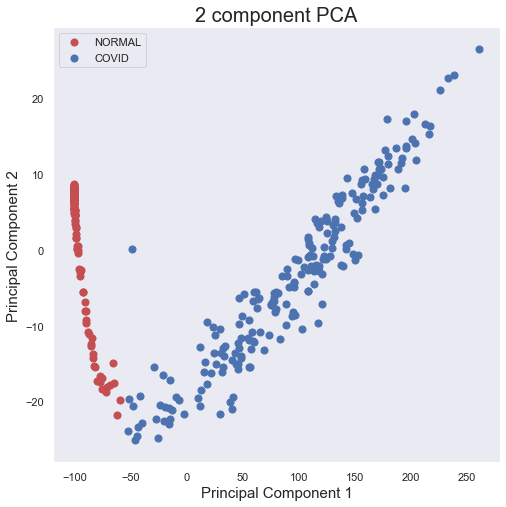

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["NORMAL","COVID"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = wardDf['clusters_ward_pca'] == target
    ax.scatter(wardDf.loc[indicesToKeep, 'principal component 1']
               , wardDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Single Linkage 

In [53]:
model2 = AgglomerativeClustering(n_clusters=2, compute_full_tree=True,
    affinity='euclidean', linkage='single')
model2.fit(d2_train_dataset)
model2.labels_
x2 = model2.labels_

In [54]:
x2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
for i in range(len(x2)):
    if(x2[i]==0):
        x2[i]=1
    else:
        x2[i]=0

In [56]:
score = round(accuracy_score(x2, y_train), 4)
print('Accuracy scored using complete linkage Agglomerative clustering: ', score)

Accuracy scored using complete linkage Agglomerative clustering:  0.5024


              precision    recall  f1-score   support

           0       1.00      0.00      0.01       209
           1       0.50      1.00      0.67       209

    accuracy                           0.50       418
   macro avg       0.75      0.50      0.34       418
weighted avg       0.75      0.50      0.34       418



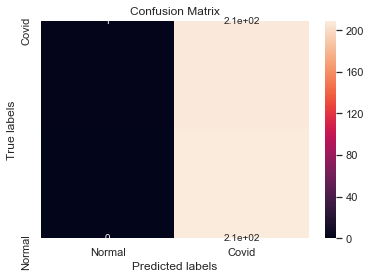

In [57]:
conf_mat_single = confusion_matrix(y_train, x2)
conf_mat(conf_mat_single)
cr_single=classification_report(y_train,x2)
print(cr_single)

## Single Linkage_PCA 

In [58]:
model2_pca = AgglomerativeClustering(n_clusters=2, compute_full_tree=True,
    affinity='euclidean', linkage='single')
model2_pca.fit(principalDf)
clusters_single_pca = model2_pca.labels_
clusters_single_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
singleDf = pd.concat([principalDf, pd.DataFrame({"clusters_single_pca": clusters_ward_pca})], axis = 1)
singleDf['clusters_single_pca'] = singleDf['clusters_single_pca'].map({0: "COVID", 1: "NORMAL"})
singleDf

,principal component 1,principal component 2,clusters_single_pca
0,-100.704773,6.714652,NORMAL
1,-100.767120,6.790287,NORMAL
2,-100.972023,8.408571,NORMAL
3,-100.889999,7.752181,NORMAL
4,-100.939255,8.130751,NORMAL
...,...,...,...
413,-25.922192,-24.854021,COVID
414,148.885178,4.853137,COVID
415,174.689423,9.623315,COVID
416,132.215210,2.571312,COVID


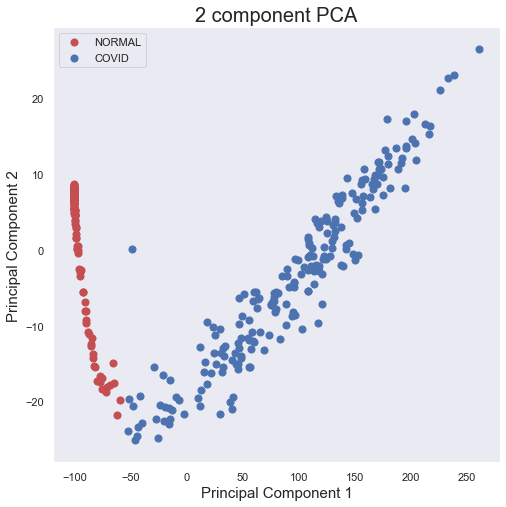

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["NORMAL","COVID"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = singleDf['clusters_single_pca'] == target
    ax.scatter(wardDf.loc[indicesToKeep, 'principal component 1']
               , wardDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# BIRCH

In [61]:
bclust=Birch(branching_factor=100, threshold=.05,n_clusters=2).fit(d2_train_dataset)
print(bclust)
labels_birch = bclust.predict(d2_train_dataset)
labels_birch

Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=2,
      threshold=0.05)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [62]:
labels_birch

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [63]:
for i in range(len(labels_birch)):
    if(labels_birch[i]==0):
        labels_birch[i]=1
    else:
        labels_birch[i]=0

In [64]:
score = round(accuracy_score(labels_birch, y_train), 4)
print('Accuracy scored using complete linkage Agglomerative clustering: ', score)

Accuracy scored using complete linkage Agglomerative clustering:  0.9474


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       209
           1       0.99      0.90      0.94       209

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



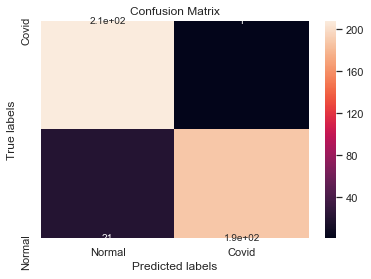

In [65]:
conf_mat_birch = confusion_matrix(y_train, labels_birch)
conf_mat(conf_mat_birch)
cr_birch=classification_report(y_train,labels_birch)
print(cr_birch)

## BIRCH_PCA 

In [66]:
bclust_pca = Birch(branching_factor=100, threshold=.05,n_clusters=2).fit(d2_train_dataset)
bclust_pca.fit(principalDf)
clusters_bclust_pca = bclust_pca.labels_
clusters_bclust_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [67]:
bclustDf = pd.concat([principalDf, pd.DataFrame({"clusters_bclust_pca": clusters_ward_pca})], axis = 1)
bclustDf['clusters_bclust_pca'] = bclustDf['clusters_bclust_pca'].map({0: "COVID", 1: "NORMAL"})
bclustDf

,principal component 1,principal component 2,clusters_bclust_pca
0,-100.704773,6.714652,NORMAL
1,-100.767120,6.790287,NORMAL
2,-100.972023,8.408571,NORMAL
3,-100.889999,7.752181,NORMAL
4,-100.939255,8.130751,NORMAL
...,...,...,...
413,-25.922192,-24.854021,COVID
414,148.885178,4.853137,COVID
415,174.689423,9.623315,COVID
416,132.215210,2.571312,COVID


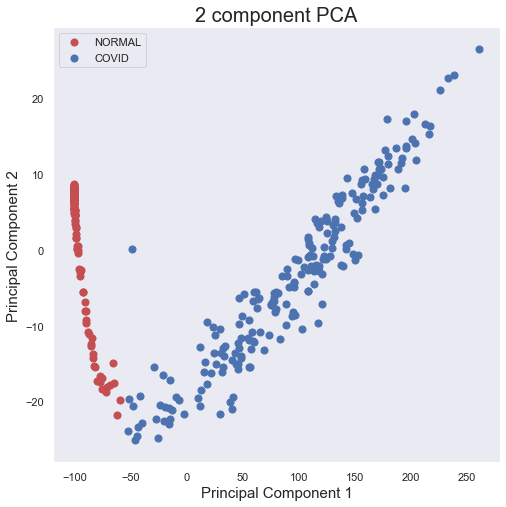

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["NORMAL","COVID"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = singleDf['clusters_single_pca'] == target
    ax.scatter(wardDf.loc[indicesToKeep, 'principal component 1']
               , wardDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [69]:
metric1 = metrics.silhouette_score(d2_train_dataset, labels_birch, metric = 'euclidean') #silhouette coefficient
metric1

0.75487536

In [70]:
metric2 =  metrics.calinski_harabasz_score(d2_train_dataset, labels_birch)#Cvscore
metric2

2156.2345589709703